In [6]:
from hmmlearn import hmm
import numpy as np

# Define the HMM model
model = hmm.MultinomialHMM(n_components=2)

# Set the initial probabilities (pi)
model.startprob_ = np.array([0.6, 0.4])

# Set the transition probabilities (A)
model.transmat_ = np.array([[0.7, 0.3],
                            [0.4, 0.6]])

# Set the emission probabilities (B)
model.emissionprob_ = np.array([[0.1, 0.4, 0.5],
                                [0.6, 0.3, 0.1]])

# Generate a sequence of observations
obs_seq = np.array([[0, 2, 1, 1, 2, 0]])

# Reshape the observation sequence to fit the model's requirements
obs_seq = obs_seq.reshape((len(obs_seq[0]), 1))

# Fit the model to the observations
model.fit(obs_seq)

# Predict the hidden states for the given observations
hidden_states = model.predict(obs_seq)

# Print the result
print("Observations:", obs_seq.flatten())
print("Predicted Hidden States:", hidden_states)

# Compute the forward probability
forward_prob = model.score(obs_seq)
print("Forward Probability:", forward_prob)

# Compute the backward probability
backward_prob = np.exp(model.score_samples(obs_seq)[0])
print("Backward Probability:", backward_prob)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Observations: [0 2 1 1 2 0]
Predicted Hidden States: [1 0 0 0 0 0]
Forward Probability: 1.1102230246251565e-16
Backward Probability: 1.0


In [7]:
from hmmlearn import hmm
import numpy as np

# Define the HMM model
model = hmm.MultinomialHMM(n_components=2)

# Set the initial probabilities (pi)
model.startprob_ = np.array([0.6, 0.4])

# Set the transition probabilities (A)
model.transmat_ = np.array([[0.8, 0.2],
                            [0.4, 0.6]])

# Set the emission probabilities (B)
model.emissionprob_ = np.array([[0.4, 0.1, 0.1, 0.3],
                                [0.3, 0.45, 0.2, 0.05]])

# Generate a sequence of observations
obs_seq = np.array([[1, 3, 2, 0]])

# Reshape the observation sequence to fit the model's requirements
obs_seq = obs_seq.reshape((len(obs_seq[0]), 1))

# Fit the model to the observations
model.fit(obs_seq)

# Predict the hidden states for the given observations
hidden_states = model.predict(obs_seq)

# Print the result
print("Observations:", obs_seq.flatten())
print("Predicted Hidden States:", hidden_states)

# Compute the forward probability
forward_prob = model.score(obs_seq)
print("Forward Probability:", forward_prob)

# Compute the backward probability
backward_prob = np.exp(model.score_samples(obs_seq)[0])
print("Backward Probability:", backward_prob)


MultinomialHMM has undergone major changes. The previous version was implementing a CategoricalHMM (a special case of MultinomialHMM). This new implementation follows the standard definition for a Multinomial distribution (e.g. as in https://en.wikipedia.org/wiki/Multinomial_distribution). See these issues for details:
https://github.com/hmmlearn/hmmlearn/issues/335
https://github.com/hmmlearn/hmmlearn/issues/340
Even though the 'startprob_' attribute is set, it will be overwritten during initialization because 'init_params' contains 's'
Even though the 'transmat_' attribute is set, it will be overwritten during initialization because 'init_params' contains 't'


Observations: [1 3 2 0]
Predicted Hidden States: [1 1 1 1]
Forward Probability: 2.7755575615628914e-16
Backward Probability: 1.0000000000000002


Most likely hidden states: [0 1 2 2 3 3 3 3]


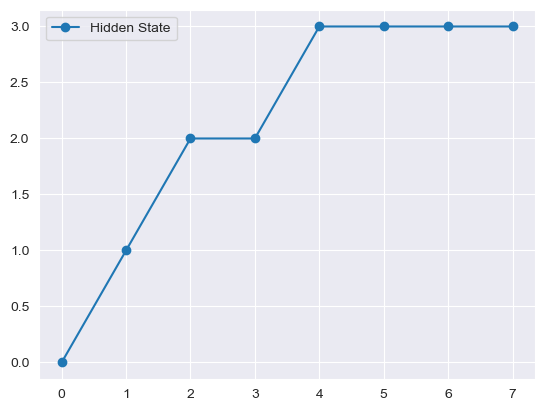

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

# Define the state space
states = ["Silence", "Word1", "Word2", "Word3"]
n_states = len(states)

# Define the observation space
observations = ["Loud", "Soft"]
n_observations = len(observations)

# Define the initial state distribution
start_probability = np.array([0.8, 0.1, 0.1, 0.0])

# Define the state transition probabilities
transition_probability = np.array([[0.7, 0.2, 0.1, 0.0],
									[0.0, 0.6, 0.4, 0.0],
									[0.0, 0.0, 0.6, 0.4],
									[0.0, 0.0, 0.0, 1.0]])

# Define the observation likelihoods
emission_probability = np.array([[0.7, 0.3],
								[0.4, 0.6],
								[0.6, 0.4],
								[0.3, 0.7]])

# Fit the model
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = start_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

# Define the sequence of observations
observations_sequence = np.array([0, 1, 0, 0, 1, 1, 0, 1]).reshape(-1, 1)

# Predict the most likely hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

# Plot the results
sns.set_style("darkgrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.legend()
plt.show()


Number of hidden states : 2
Number of observations : 2
State probability:  [0.6 0.4]

Transition probability:
 [[0.7 0.3]
 [0.3 0.7]]

Emission probability:
 [[0.9 0.1]
 [0.2 0.8]]
Most likely hidden states: [0 1 1 1 0 0]
Log Probability : -6.360602626270058
Most likely hidden states: [0 1 1 1 0 0]


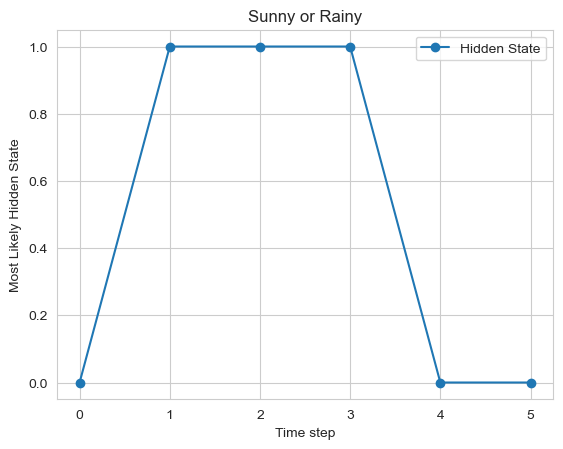

In [10]:
# Define the state space
states = ["Sunny", "Rainy"]
n_states = len(states)
print('Number of hidden states :',n_states)
# Define the observation space
observations = ["Dry", "Wet"]
n_observations = len(observations)
print('Number of observations :',n_observations)
# Define the initial state distribution
state_probability = np.array([0.6, 0.4])
print("State probability: ", state_probability)

# Define the state transition probabilities
transition_probability = np.array([[0.7, 0.3],
								[0.3, 0.7]])
print("\nTransition probability:\n", transition_probability)
# Define the observation likelihoods
emission_probability= np.array([[0.9, 0.1],
								[0.2, 0.8]])
print("\nEmission probability:\n", emission_probability)
model = hmm.CategoricalHMM(n_components=n_states)
model.startprob_ = state_probability
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability
# Define the sequence of observations
observations_sequence = np.array([0, 1, 0, 1, 0, 0]).reshape(-1, 1)
observations_sequence
# Predict the most likely sequence of hidden states
hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)
log_probability, hidden_states = model.decode(observations_sequence,
											lengths = len(observations_sequence),
											algorithm ='viterbi' )

print('Log Probability :',log_probability)
print("Most likely hidden states:", hidden_states)
# Plot the results
sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Time step')
plt.ylabel('Most Likely Hidden State')
plt.title("Sunny or Rainy")
plt.legend()
plt.show()
